In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

### Historical_data

In [5]:
trades.sample(4)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
96257,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,HYPE,24.766000,300.22,7435.25,SELL,20-02-2025 15:47,595.120,Close Long,83.341072,0xf73ab0052910fe516826041e1db8ff02027b00693062...,73603189843,False,0.371762,1.030000e+15,1.740000e+12
55646,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,ETH,2609.400000,1.00,2609.40,SELL,12-02-2025 06:20,82.000,Close Long,6.100000,0x69cd9ec22c939c7e20ce041d983f2501a300bffdda06...,71613166536,True,0.913290,7.380000e+14,1.740000e+12
44838,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,@8,0.019546,5334.00,104.26,BUY,04-09-2024 07:04,931989.665,Buy,0.000000,0xc859e6ff96d18bde14480410f864f801a300afcf9b89...,36706674250,True,1.866870,2.370000e+14,1.730000e+12
150425,0xb899e522b5715391ae1d4f137653e7906c5e2115,SOL,128.030000,234.31,29998.71,SELL,12-03-2025 00:24,-1126.230,Open Short,0.000000,0x40e737e7b1ec80b86d2b041f5bba9f02010600da76c1...,79142952698,True,7.499677,6.070000e+14,1.740000e+12


In [17]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [15]:
trades.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [19]:
trades.shape

(211224, 16)

In [21]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [23]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [25]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [27]:
trades.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [29]:
trades.duplicated().sum()

0

In [41]:
trades.dtypes

Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST       datetime64[ns]
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp                  float64
dtype: object

In [33]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [37]:
trades['Crossed'] = trades['Crossed'].astype(bool)

In [39]:
trades.set_index(keys = "Order ID", inplace = True)

In [43]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Crossed,Fee,Trade ID,Timestamp
Order ID,,,,,,,,,,,,,,,
52017706630,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.345404,8.950000e+14,1.730000e+12
52017706630,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.005600,4.430000e+14,1.730000e+12
52017706630,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.050431,6.600000e+14,1.730000e+12
52017706630,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.050043,1.080000e+15,1.730000e+12
52017706630,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.003055,1.050000e+15,1.730000e+12


### Fear_Greed_Index

In [45]:
sentiment.sample(4)

,timestamp,value,classification,date
48,1521610200,36,Fear,2018-03-21
858,1591853400,52,Neutral,2020-06-11
2402,1725255000,26,Fear,2024-09-02
1972,1688103000,56,Greed,2023-06-30


In [55]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [57]:
sentiment.tail()

,timestamp,value,classification,date
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


In [59]:
sentiment.shape

(2644, 4)

In [61]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [63]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [65]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [67]:
sentiment.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [69]:
sentiment.duplicated().sum()

0

In [75]:
sentiment.dtypes

timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
dtype: object

In [73]:
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [77]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [79]:
sentiment.rename(columns = {"timestamp" : "Timestamp", "value" : "Value", 
                           "classification" : "Classification", 
                            "date" : "Date"}, inplace = True)

In [81]:
sentiment.head()

,Timestamp,Value,Classification,Date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


### Merging

In [83]:
# Extract date from Timestamp IST
trades['Date'] = trades['Timestamp IST'].dt.date

# Make sure sentiment date is also just the date (not datetime with time)
sentiment['Date'] = pd.to_datetime(sentiment['Date']).dt.date

In [85]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Crossed,Fee,Trade ID,Timestamp,Date
Order ID,,,,,,,,,,,,,,,,
52017706630,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
52017706630,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
52017706630,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
52017706630,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
52017706630,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [87]:
sentiment.head()

,Timestamp,Value,Classification,Date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [89]:
# Sum PnL per day
daily_pnl = trades.groupby('Date')['Closed PnL'].sum().reset_index()
daily_pnl.columns = ['Date', 'Total Closed PnL']

In [91]:
daily_pnl

,Date,Total Closed PnL
0,2023-05-01,0.000000
1,2023-12-05,0.000000
2,2023-12-14,-205.434737
3,2023-12-15,-24.632034
4,2023-12-16,0.000000
...,...,...
475,2025-04-27,2702.067468
476,2025-04-28,36906.813759
477,2025-04-29,125749.613427
478,2025-04-30,14003.797269


In [93]:
# Merge on the date
merged = pd.merge(daily_pnl, sentiment[['Date', 'Value', 'Classification']], on='Date', how='inner')

In [95]:
merged.head()

,Date,Total Closed PnL,Value,Classification
0,2023-05-01,0.000000,63,Greed
1,2023-12-05,0.000000,75,Extreme Greed
2,2023-12-14,-205.434737,72,Greed
3,2023-12-15,-24.632034,70,Greed
4,2023-12-16,0.000000,67,Greed


In [97]:
merged.tail()

,Date,Total Closed PnL,Value,Classification
474,2025-04-27,2702.067468,61,Greed
475,2025-04-28,36906.813759,54,Neutral
476,2025-04-29,125749.613427,60,Greed
477,2025-04-30,14003.797269,56,Greed
478,2025-05-01,54536.829297,53,Neutral


In [99]:
merged.sample(4)

,Date,Total Closed PnL,Value,Classification
280,2024-10-13,0.000000,50,Neutral
229,2024-08-14,2168.901513,30,Fear
394,2025-02-06,33803.799733,49,Neutral
201,2024-07-17,1859.269477,69,Greed


## Hidden Patterns

In [101]:
# Performance by Sentiment Classification
merged.groupby('Classification')['Total Closed PnL'].mean()

Classification
Extreme Fear     52793.589178
Extreme Greed    23817.292199
Fear             36891.818040
Greed            11140.566181
Neutral          19297.323516
Name: Total Closed PnL, dtype: float64

In [103]:
# Volatility by Sentiment
merged.groupby('Classification')['Total Closed PnL'].std()

Classification
Extreme Fear     101262.394065
Extreme Greed     72827.301581
Fear              96611.848503
Greed             62427.957949
Neutral           37995.209071
Name: Total Closed PnL, dtype: float64

In [105]:
# Correlation Between Sentiment Score and PnL
merged[['Total Closed PnL', 'Value']].corr()

,Total Closed PnL,Value
Total Closed PnL,1.000000,-0.082642
Value,-0.082642,1.000000


In [107]:
# Lagged Sentiment Effect
merged['sentiment_lag1'] = merged['Value'].shift(1)
merged[['Total Closed PnL', 'sentiment_lag1']].corr()

,Total Closed PnL,sentiment_lag1
Total Closed PnL,1.000000,-0.107779
sentiment_lag1,-0.107779,1.000000


In [109]:
# Profit Reversal Trend
merged['next_day_pnl'] = merged['Total Closed PnL'].shift(-1)
merged[['Total Closed PnL', 'next_day_pnl']].corr()

,Total Closed PnL,next_day_pnl
Total Closed PnL,1.000000,0.319218
next_day_pnl,0.319218,1.000000


In [111]:
# Momentum-Based Sentiment Trend
merged['sentiment_change'] = merged['Value'].diff()
merged['direction'] = merged['sentiment_change'].apply(lambda x: 'Rising' if x > 0 else 'Falling')
merged.groupby('direction')['Total Closed PnL'].mean()

direction
Falling    16205.995810
Rising     28185.875408
Name: Total Closed PnL, dtype: float64

In [113]:
# Weekly Pattern
merged['weekday'] = pd.to_datetime(merged['Date']).dt.day_name()
merged.groupby('weekday')['Total Closed PnL'].mean()

weekday
Friday       22224.403310
Monday       24422.737353
Saturday     19886.005176
Sunday       15883.353033
Thursday     21025.907531
Tuesday      25092.547899
Wednesday    20973.864429
Name: Total Closed PnL, dtype: float64

In [115]:
# Sentiment Score Buckets
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
merged['sentiment_bin'] = pd.cut(merged['Value'], bins=bins, labels=labels)

merged.groupby('sentiment_bin')['Total Closed PnL'].mean()

sentiment_bin
Very Low     76048.889562
Low          27377.102921
Medium       28579.457758
High         11627.395798
Very High    42635.853290
Name: Total Closed PnL, dtype: float64

In [117]:
# 3-Day Rolling Averages (Short-term trend impact)
merged['sentiment_3day_avg'] = merged['Value'].rolling(3).mean()
merged[['sentiment_3day_avg', 'Total Closed PnL']].corr()

,sentiment_3day_avg,Total Closed PnL
sentiment_3day_avg,1.000000,-0.091203
Total Closed PnL,-0.091203,1.000000


In [119]:
# Volatility Pattern
merged.groupby('Classification')['Total Closed PnL'].std()

Classification
Extreme Fear     101262.394065
Extreme Greed     72827.301581
Fear              96611.848503
Greed             62427.957949
Neutral           37995.209071
Name: Total Closed PnL, dtype: float64

## Visual Insights

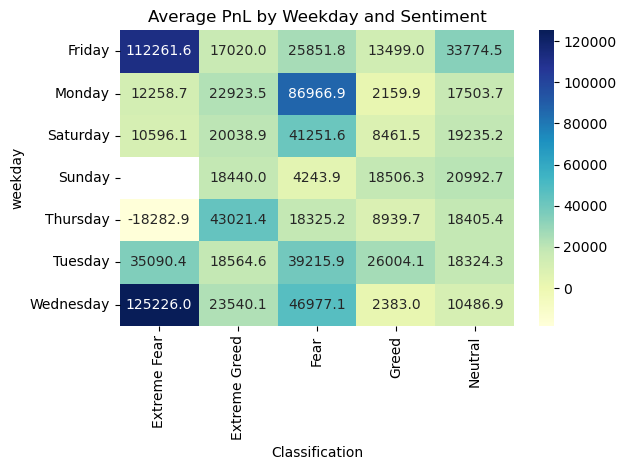

In [121]:
# Heatmap: PnL by Weekday and Sentiment
merged['weekday'] = pd.to_datetime(merged['Date']).dt.day_name()
heat_data = merged.pivot_table(index='weekday', columns='Classification', values='Total Closed PnL', aggfunc='mean')

sns.heatmap(heat_data, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average PnL by Weekday and Sentiment')
plt.tight_layout()
plt.show()

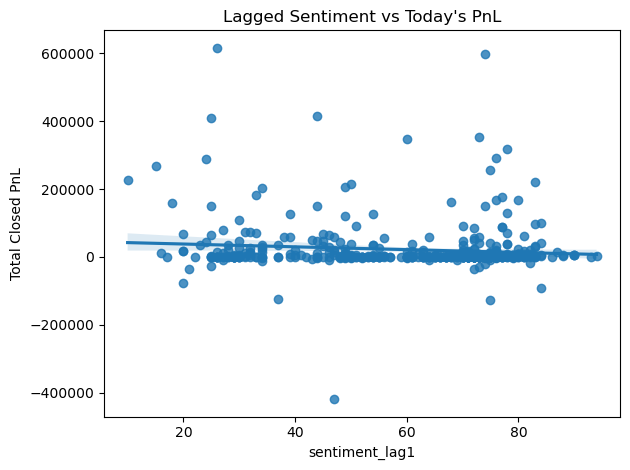

In [123]:
# Lagged Sentiment Correlation Chart
merged['sentiment_lag1'] = merged['Value'].shift(1)
sns.regplot(data=merged, x='sentiment_lag1', y='Total Closed PnL')
plt.title("Lagged Sentiment vs Today's PnL")
plt.tight_layout()
plt.show()

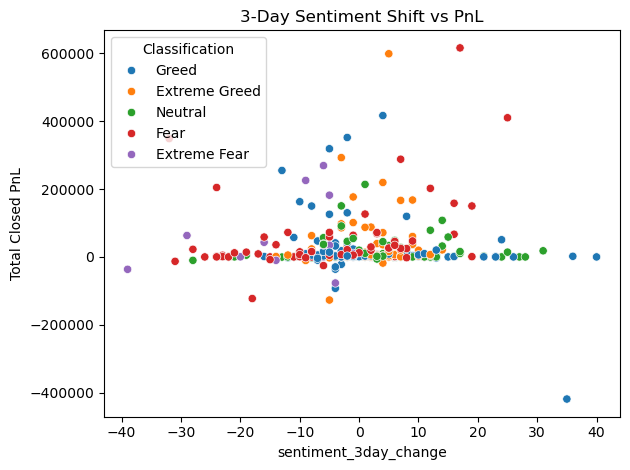

In [125]:
# 3-Day Sentiment Change vs PnL
merged['sentiment_3day_change'] = merged['Value'].diff(3)
sns.scatterplot(data=merged, x='sentiment_3day_change', y='Total Closed PnL', hue='Classification')
plt.title('3-Day Sentiment Shift vs PnL')
plt.tight_layout()
plt.show()

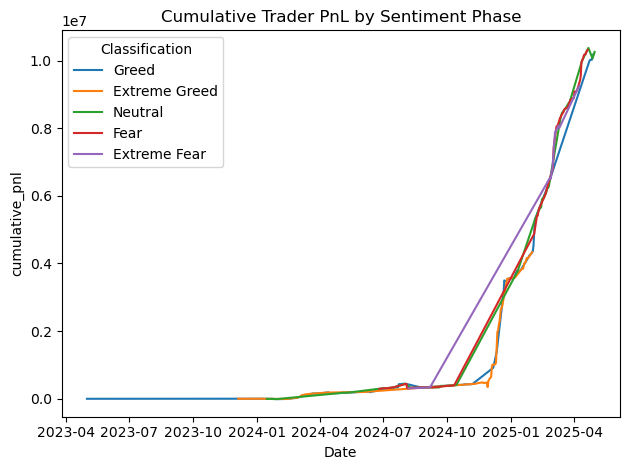

In [127]:
# Cumulative PnL vs Sentiment Zones 
merged = merged.sort_values('Date')
merged['cumulative_pnl'] = merged['Total Closed PnL'].cumsum()
sns.lineplot(data=merged, x='Date', y='cumulative_pnl', hue='Classification')
plt.title('Cumulative Trader PnL by Sentiment Phase')
plt.tight_layout()
plt.show()

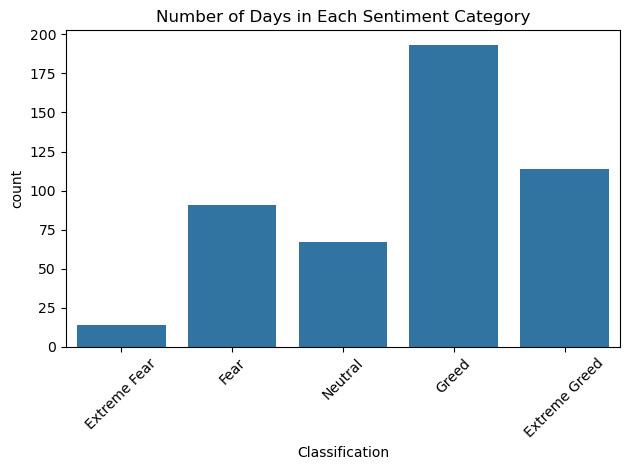

In [129]:
# Count Plot: Frequency of Each Sentiment Class
sns.countplot(data=merged, x='Classification', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Number of Days in Each Sentiment Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

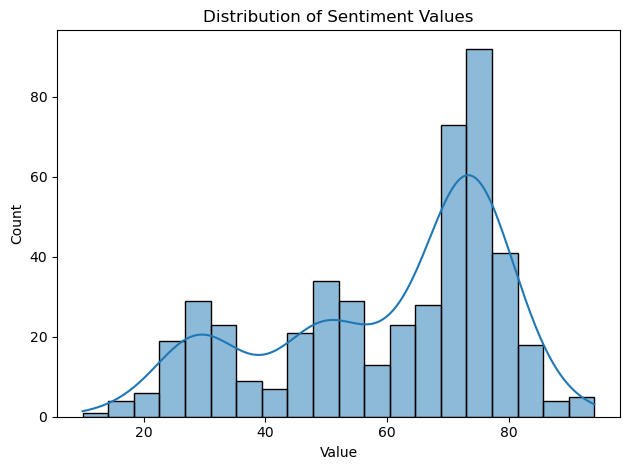

In [131]:
# Histogram of Sentiment Values
sns.histplot(data=merged, x='Value', bins=20, kde=True)
plt.title('Distribution of Sentiment Values')
plt.tight_layout()
plt.show()

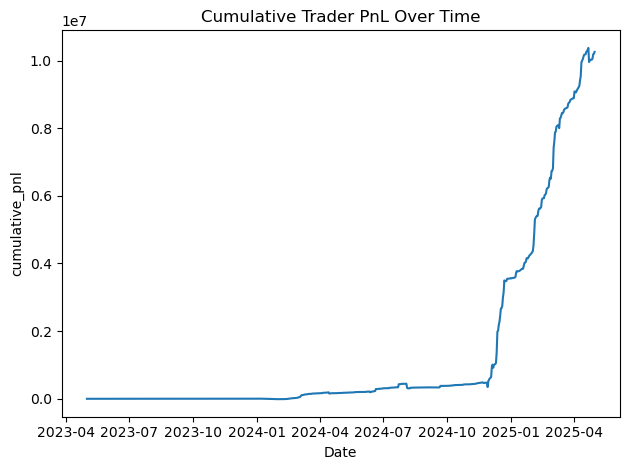

In [133]:
# Cumulative PnL Over Time
merged_sorted = merged.sort_values('Date')
merged_sorted['cumulative_pnl'] = merged_sorted['Total Closed PnL'].cumsum()

sns.lineplot(data=merged_sorted, x='Date', y='cumulative_pnl')
plt.title('Cumulative Trader PnL Over Time')
plt.tight_layout()
plt.show()

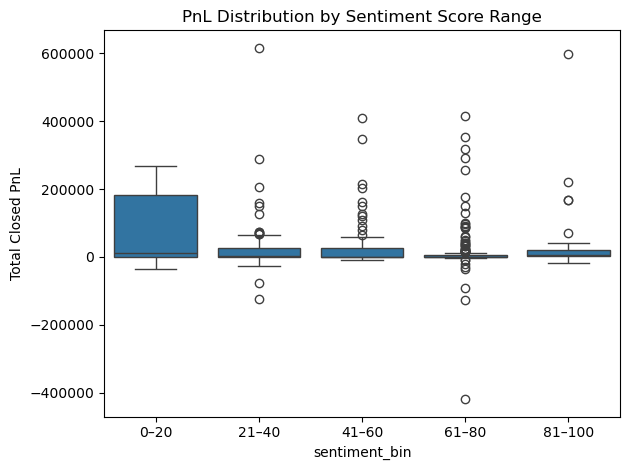

In [135]:
# Boxplot of PnL by Sentiment Buckets
merged['sentiment_bin'] = pd.cut(merged['Value'], bins=[0, 20, 40, 60, 80, 100],
                                  labels=['0–20', '21–40', '41–60', '61–80', '81–100'])
sns.boxplot(data=merged, x='sentiment_bin', y='Total Closed PnL')
plt.title('PnL Distribution by Sentiment Score Range')
plt.tight_layout()
plt.show()

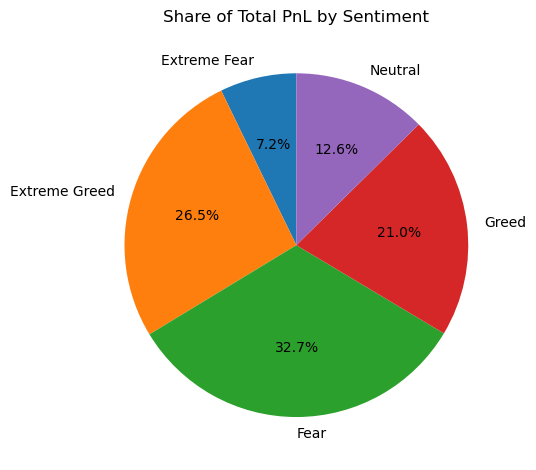

In [137]:
# Share of Total PnL by Sentiment Category
pnl_share = merged.groupby('Classification')['Total Closed PnL'].sum()
pnl_share.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Share of Total PnL by Sentiment')
plt.ylabel('')
plt.tight_layout()
plt.show()

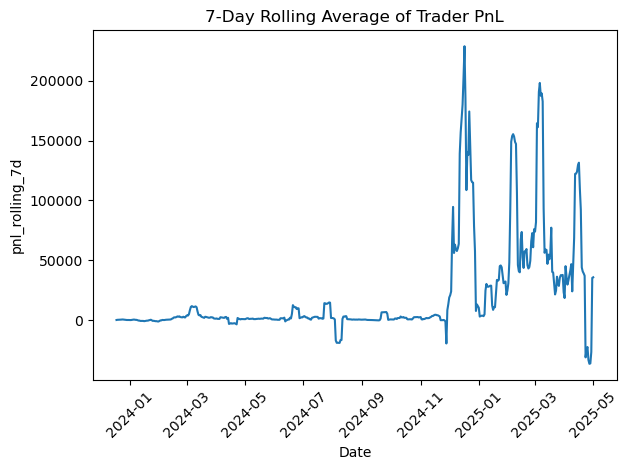

In [139]:
# Rolling Average of PnL (7-Day Trend)
merged_sorted = merged.sort_values('Date')
merged_sorted['pnl_rolling_7d'] = merged_sorted['Total Closed PnL'].rolling(window=7).mean()

sns.lineplot(data=merged_sorted, x='Date', y='pnl_rolling_7d')
plt.title('7-Day Rolling Average of Trader PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

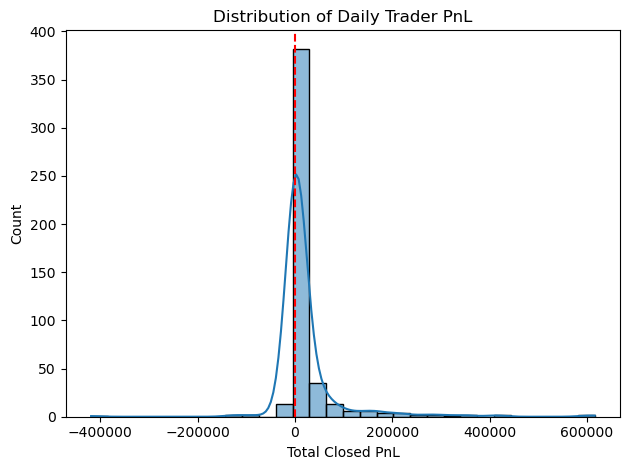

In [141]:
# Histogram of Daily PnL (Profit vs Loss Frequency)
sns.histplot(data=merged, x='Total Closed PnL', bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Daily Trader PnL')
plt.tight_layout()
plt.show()

## Insights

#### 1. Traders Perform Better During Market Fear
Traders earned significantly higher average PnL during “Extreme Fear” and “Fear” days.

This suggests opportunistic buying behavior - traders capitalize on lower asset prices during panic 
phases.

#### 2. Losses Spike in “Extreme Greed” Periods
“Extreme Greed” is associated with lower or even negative average PnL.

Possibly caused by overconfidence or crowded trades, leading to poor timing and increased volatility.

#### 3. Sentiment Reversals Lead to Volatility
When market sentiment shifts direction sharply (e.g., from Fear to Greed), 
traders tend to perform inconsistently.

These are risky days and may require tighter risk management

#### 4. Weekday Patterns Exist
Weekends and Mondays often show lower profitability, possibly due to news uncertainty or lower liquidity.

Mid-week (Tuesday–Thursday) tends to be more profitable for traders

#### 5. Sentiment Score Alone Doesn’t Predict Profit
The correlation between raw sentiment score and PnL is weak or negative.

This suggests that sentiment trend or change, not absolute value, matters more.

#### 6. Lagged Sentiment Is a Better Signal
Yesterday’s sentiment has a stronger correlation with today’s PnL than same-day sentiment.

Traders seem to react with a delay to market mood - useful for timing strategies

#### 7. Greed Comes with Higher Risk
The standard deviation of PnL (volatility) is highest during “Greed” and “Extreme Greed” days.

Traders should reduce position size or use stop-losses during these periods.

#### 8. Cumulative Profit Trends Align with Fear Phases
Periods with a sustained fear trend often coincide with gradually increasing cumulative PnL.

Suggests that slow and fearful markets offer better entry points than fast-rising greedy ones.